In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [4]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [6]:
columns_to_consider = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
df_original = df.copy()
df = df[columns_to_consider]
df.dropna(inplace=True)

In [7]:
df.head(10)

,QUANTITYORDERED,PRICEEACH,SALES
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,5205.27
5,36,96.66,3479.76
6,29,86.13,2497.77
7,48,100.00,5512.32
8,22,98.57,2168.54
9,41,100.00,4708.44


In [19]:
standard_scaler = StandardScaler()

In [9]:
scaled_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=df.columns)

In [11]:
cluster_range = range(1, 20)
inertia = []

In [12]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

c:\Users\Darshan Mahajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Darshan Mahajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Darshan Mahajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Darshan Mahajan\AppData\Local\Programs\Python\

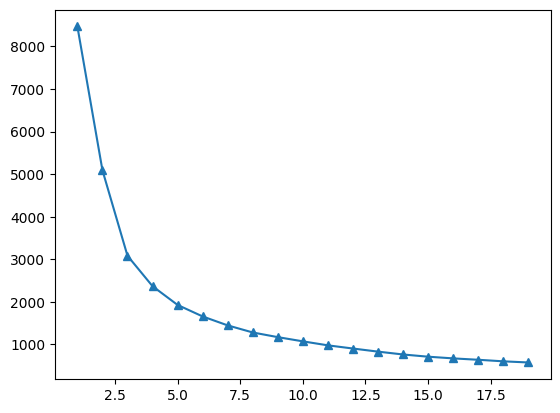

In [23]:
plt.plot(cluster_range, inertia, marker='^')
plt.show()

In [14]:
optimal_k = 10

In [15]:
kmeans = KMeans(n_clusters=optimal_k)

In [16]:
kmeans.fit(df)

c:\Users\Darshan Mahajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [17]:
df['cluster'] = kmeans.predict(df)

In [18]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,cluster
0,-0.522891,0.596978,-0.370825,2
1,-0.112201,-0.114450,-0.427897,1
2,0.606505,0.549384,0.179443,0
3,1.017195,-0.019759,0.104701,7
4,1.427884,0.810158,0.896740,3
